# **1. Load and Inspect Datasets**

In [1]:
import pandas as pd
from google.colab import files

# Upload files from local machine:  googleplaystore.csv, googleplaystore_user_reviews.csv
uploaded = files.upload()

# Check if files were uploaded
uploaded_files = list(uploaded.keys())
print("Uploaded files:", uploaded_files)

# Load the data from uploaded files
googleplaystore_df = pd.read_csv(uploaded_files[0])  # googleplaystore.csv
user_reviews_df = pd.read_csv(uploaded_files[1])  # googleplaystore_user_reviews.csv

# Check if data is loaded correctly
print("Google Play Store Data:")
print(googleplaystore_df.head())

print("\nUser Reviews Data:")
print(user_reviews_df.head())


Saving googleplaystore.csv to googleplaystore.csv
Saving googleplaystore_user_reviews.csv to googleplaystore_user_reviews.csv
Uploaded files: ['googleplaystore.csv', 'googleplaystore_user_reviews.csv']
Google Play Store Data:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen  

# **2. Merge Datasets by 'App' Column**

In [2]:
# Merge the datasets using the 'App' column, keeping only 'App' and 'Category' from googleplaystore_df
merged_df = pd.merge(user_reviews_df, googleplaystore_df[['App', 'Category']], on='App', how='left')

# Check the merged result
print("\nMerged Dataset Preview:")
print(merged_df.head())



Merged Dataset Preview:
                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
2  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You    This help eating healthy exercise regular basis   
4  10 Best Foods for You                                                NaN   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity            Category  
0  Positive                1.00                0.533333  HEALTH_AND_FITNESS  
1  Positive                1.00                0.533333  HEALTH_AND_FITNESS  
2  Positive                0.25                0.288462  HEALTH_AND_FITNESS  
3  Positive                0.25                0.288462  HEALTH_AND_FITNESS  
4       NaN                 NaN                     NaN  HEALTH_AND_FITNESS  


# **3. Sentiment Distribution by Category**

In [3]:
# Count the number of reviews for each sentiment and category
sentiment_counts = merged_df.groupby(['Category', 'Sentiment']).size().unstack(fill_value=0)

# Convert the counts to percentages
sentiment_percentage = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

# Check the result
print("\nSentiment Percentage by Category:")
print(sentiment_percentage.head())



Sentiment Percentage by Category:
Sentiment             Negative    Neutral   Positive
Category                                            
ART_AND_DESIGN       15.968586  16.230366  67.801047
AUTO_AND_VEHICLES     5.882353  12.456747  81.660900
BEAUTY               19.230769  26.035503  54.733728
BOOKS_AND_REFERENCE  16.441718  15.950920  67.607362
BUSINESS             14.571794  23.647209  61.780997


# **4. Visualize Sentiment Distribution**

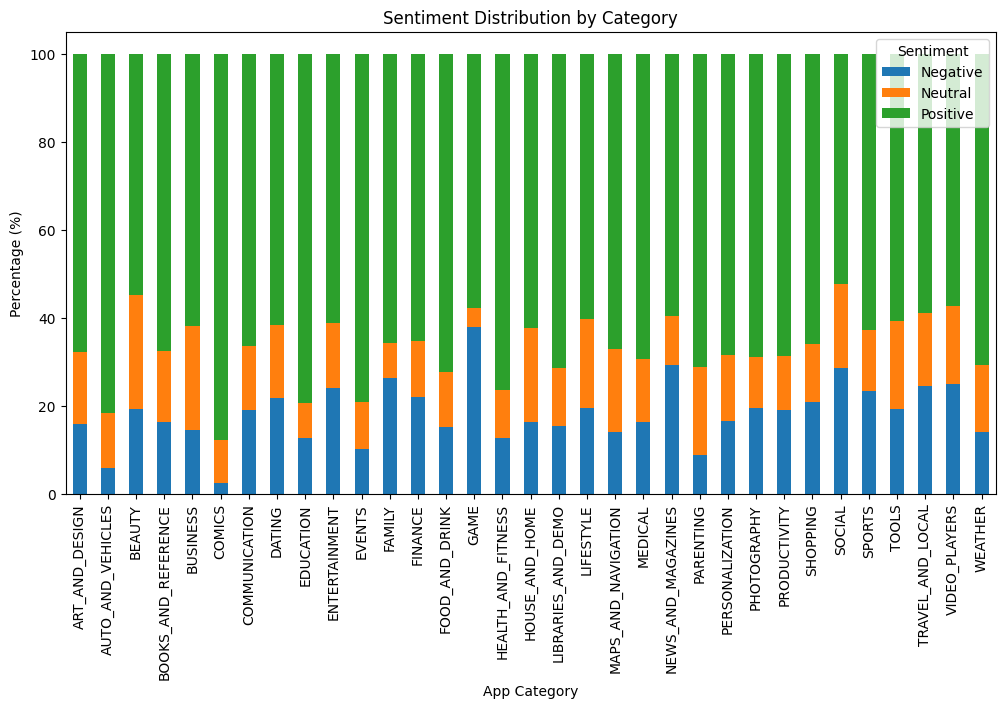

In [4]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
sentiment_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add title and labels
plt.title('Sentiment Distribution by Category')
plt.xlabel('App Category')
plt.ylabel('Percentage (%)')

# Rotate category labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


# **5. Word Cloud Visualization**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Creating 'Cleaned_Review' column...
                                   Translated_Review  \
0  I like eat delicious food. That's I'm cooking ...   
1    This help eating healthy exercise regular basis   
2                                                NaN   
3         Works great especially going grocery store   
4                                       Best idea us   

                                      Cleaned_Review  
0  like eat delicious food thats im cooking food ...  
1         help eating healthy exercise regular basis  
2                                                     
3         works great especially going grocery store  
4                                       best idea us  


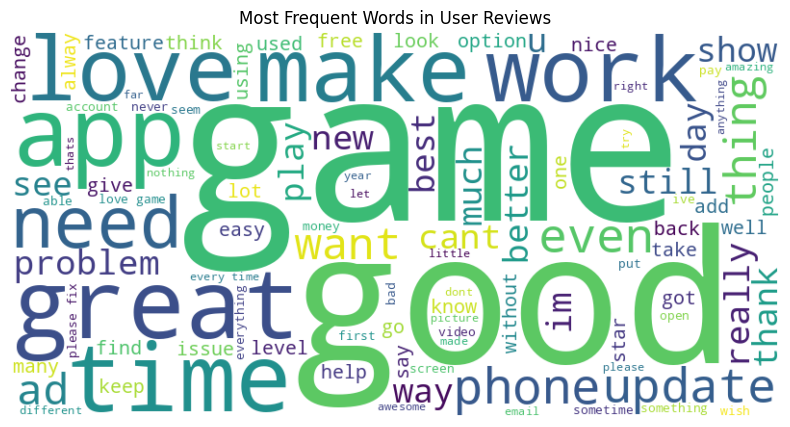

In [5]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string
import nltk

# Download stopwords
nltk.download('stopwords')

# Check if 'Cleaned_Review' column exists, if not, create it
if 'Cleaned_Review' not in user_reviews_df.columns:
    print("Creating 'Cleaned_Review' column...")

    # Load stop words
    stop_words = set(stopwords.words('english'))

    # Function to preprocess text
    def preprocess_text(text):
        if not isinstance(text, str):
            return ""  # If text is not a string, return empty string
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = ''.join([char for char in text if char not in string.punctuation])
        # Split into words and remove stop words
        words = text.split()
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)

    # Apply preprocessing to the 'Translated_Review' column
    user_reviews_df['Cleaned_Review'] = user_reviews_df['Translated_Review'].apply(preprocess_text)

# Check the 'Cleaned_Review' column
print(user_reviews_df[['Translated_Review', 'Cleaned_Review']].head())

# Collect all cleaned reviews into a single string
text = ' '.join(user_reviews_df['Cleaned_Review'])

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Disable axes
plt.title('Most Frequent Words in User Reviews')
plt.show()


# **6. Key Observations and Insights**

In [6]:
observations = """
Key Observations:
1. **Sentiment Distribution**: The majority of reviews are **positive**, with fewer neutral and negative reviews.
2. **Category-Specific Trends**:
   - Categories like **Health_and_Fitness** and **Medical** have a higher proportion of **positive** reviews.
   - Categories like **Comics** and **Beauty** show more **mixed sentiments**.
3. **Outliers**: Certain categories, such as **Medical**, show **higher neutral sentiment**, which may require further investigation. This could be due to specific app features or user expectations.
4. **Positive Sentiment**: Most app categories have **positive sentiment** trends, but **neutral sentiments** may suggest areas for improvement (e.g., app functionality or performance).

Conclusion:
By merging the **googleplaystore_user_reviews** and **googleplaystore.csv** datasets, we identified general positive sentiment trends across app categories. However, some categories have **higher neutral sentiment**, indicating areas for potential app improvements, including user experience and app functionality. Further investigation could clarify these anomalies.
"""

# Display the insights (can be shown in a report or included in a document)
print(observations)



Key Observations:
1. **Sentiment Distribution**: The majority of reviews are **positive**, with fewer neutral and negative reviews.
2. **Category-Specific Trends**:
   - Categories like **Health_and_Fitness** and **Medical** have a higher proportion of **positive** reviews.
   - Categories like **Comics** and **Beauty** show more **mixed sentiments**.
3. **Outliers**: Certain categories, such as **Medical**, show **higher neutral sentiment**, which may require further investigation. This could be due to specific app features or user expectations.
4. **Positive Sentiment**: Most app categories have **positive sentiment** trends, but **neutral sentiments** may suggest areas for improvement (e.g., app functionality or performance).

Conclusion:
By merging the **googleplaystore_user_reviews** and **googleplaystore.csv** datasets, we identified general positive sentiment trends across app categories. However, some categories have **higher neutral sentiment**, indicating areas for potential